<a href="https://colab.research.google.com/github/TheHstler/Bonus-Lab-ML/blob/main/ml_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab 09

Hyper-parameter optimisation, feature selection and and feature importance.

## Imports

In [1]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_wine

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Stats
from scipy.stats import randint as sp_randint

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time

## Loading wine dataset

In [2]:
# Loading the dataset
dataset = load_wine()

# Convert to Pandas DataFrame
dataset_df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                     columns=dataset['feature_names'] + ['target'])

# Converting class labels to int
dataset_df['target'] = dataset_df['target'].astype('int')

# Storing references to feature names and (unique) class labels
feature_names = dataset['feature_names']
class_labels = dataset_df['target'].unique().astype('str')

# Get the X (feature matrix) and y (class label vector) from the data
X, y = dataset.data, dataset.target

print("Shape of feature matrix:", X.shape)

# And just to ensure we've loaded what we expect..
dataset_df.head()

Shape of feature matrix: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Utility functions

In [3]:
# Visualising the Decision Tree
def visualise_tree(model, feature_names, class_labels):
    """
    A function to visualise a decision tree model. This requires graphviz to be installed.
    :param model: the decision tree model
    :param feature_list: a list of names for the features
    :param class_labels: a list of names for the class labels
    """
    graph = Source(tree.export_graphviz(model, out_file=None
       , feature_names=feature_names, class_names=class_labels
       , filled = True))
    graph_svg = SVG(graph.pipe(format='svg'))
    display(graph_svg)

In [4]:
# Utility function to report best scores
def report(results, rank_metric='score', n_top=3):
    """
    Utility function to report best scores.
    :param results: the cv_results_ data structure from the optimisation algorithm
    :param rank_metric: name of the metric to report results for
    :param n_top: the number of top results to report
    """
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

## Manual hyper-parameter optimisation

You can do some manual hyper-parameter optimisation here, as before.

Accuracy: 0.90 (+/- 0.17)


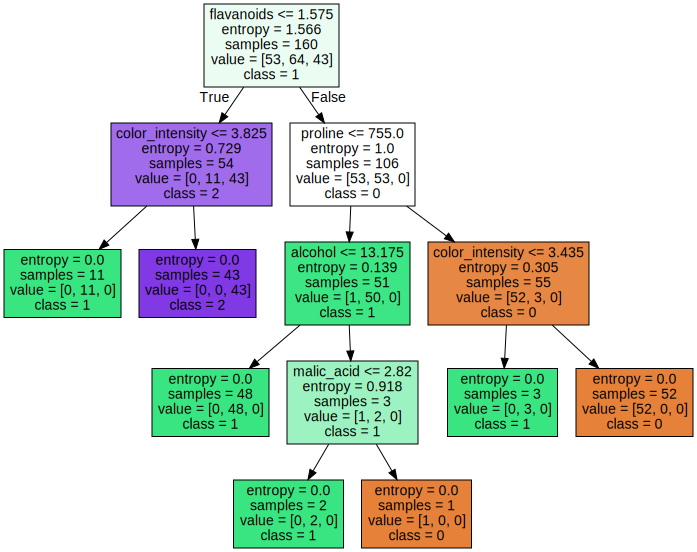

In [5]:
# Instanting model
model = DecisionTreeClassifier(max_depth=None, # smaller or larger depth?
                               criterion='entropy') # gini vs entropy?

# 10-fold cross-validation
scores = cross_validate(model, X, y, cv=10, return_estimator=True)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

# Getting the trained model from the 1st fold
model = scores['estimator'][0]

# Visualising the tree
visualise_tree(model, feature_names, class_labels)

## Hyper-parameter optimisation

Examples modified from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
 * [Randomised Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
 * [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Random Search

**TODO:** Apply Random Search here as per the lab tasks / instructions.

In [7]:
model = DecisionTreeClassifier()

param_dict = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              "criterion": ["gini", "entropy", "log_loss"]}

n_iter_search = 20 # the number of random combinations of hyper-parameter values that will be tested

random_search = RandomizedSearchCV(model,param_distributions=param_dict,
                                   n_iter=n_iter_search, cv=10)

random_search.fit(X, y)

report(random_search.cv_results_)

start_time = time()
random_search.fit(X, y)
end_time = time()

print("\nRandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((end_time - start_time), n_iter_search))



Models ranked according to score
Model with rank: 1
Mean validation score: 0.92 (+/- 0.15)
Params: {'max_depth': 8, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.90 (+/- 0.18)
Params: {'max_depth': 3, 'criterion': 'log_loss'}

Model with rank: 2
Mean validation score: 0.90 (+/- 0.18)
Params: {'max_depth': 3, 'criterion': 'entropy'}


RandomizedSearchCV took 0.54 seconds for 20 candidates parameter settings.


### Grid Search

**TODO:** Apply Grid Search here as per the lab tasks / instructions.

In [8]:
model = DecisionTreeClassifier()

param_grid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              "criterion": ["gini", "entropy", "log_loss"]}

n_iter_search = 20 # the number of random combinations of hyper-parameter values that will be tested

grid_search = GridSearchCV(model,
                           param_grid=param_grid,
                           cv=10)

random_search.fit(X, y)

report(random_search.cv_results_)

start_time = time()
random_search.fit(X, y)
end_time = time()

number_of_candidate_solutions = len(grid_search.cv_results_['params'])

print("Number of combinations evaluated:", number_of_candidate_solutions)


Models ranked according to score
Model with rank: 1
Mean validation score: 0.92 (+/- 0.15)
Params: {'max_depth': 6, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.91 (+/- 0.14)
Params: {'max_depth': 9, 'criterion': 'log_loss'}

Model with rank: 3
Mean validation score: 0.91 (+/- 0.13)
Params: {'max_depth': 4, 'criterion': 'entropy'}



AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

### Multi-metric evaluation for GridSearch

Defining metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Done something similar previously. See Lab 07 (solutions).

Another example you may find interesting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

## Recursive Feature Elimination

**TODO:** run RFE and analyse the outputs.

In [ ]:
# Instantiating classifier (with default hyper-parameter values)
model = DecisionTreeClassifier()

# Instantiating (setting up) RFE
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

start_time = time()
rfecv.fit(X, y)
end_time = time()

# Printing out the results
print("RFECV took %.2f seconds to identify %d features" %
      ((end_time - start_time), rfecv.n_features_))
print(rfecv.ranking_)

In [ ]:
# Creating a DataFrame to display the original columns and their ranking
feature_ranking_df = pd.DataFrame()
feature_ranking_df['feature'] = dataset['feature_names']
feature_ranking_df['rank'] = rfecv.ranking_

feature_ranking_df = feature_ranking_df.sort_values(by='rank', ascending=True)
feature_ranking_df

## Random Forest Feature Importance

**TODO:** run Random Forest and analyse the feature importances. Compare with RFE, above.

In [ ]:
# Instantiating RandomForest classifier (with default hyper-parameter values)
model = RandomForestClassifier(n_estimators=200,random_state=None)

# 5-fold cross validation, returning a trained model
scores = cross_validate(model, X, y, cv=5, return_estimator=True)

# Getting the trained model from the 1st fold
estimator = scores['estimator'][0]

In [ ]:
# Creating a DataFrame to display the original columns and their importance
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = dataset['feature_names']
feature_importance_df['importance'] = estimator.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=True)
#feature_importance_df

In [ ]:
feature_importance_df.plot(kind='barh',
                           x='feature',
                           y='importance',
                           title='RF Feature Importance',
                           xlabel='',
                           figsize=(16, 9),
                           fontsize=16)